# Workshop 9
# Introduction to Numerical ODE Solutions
*Source: http://phys.csuchico.edu/ayars/312 *


Standard preamble

In [1]:
# imports
from pylab import *
%matplotlib inline

## Euler method

Define a differential equation: simple harmonic motion

In [1]:
def SHO(state, time):
    g0 = state[1]
    g1 = -omega*omega*state[0]
    return array([g0,g1])



### Exercise 1

Code up a different differential equation (use a different function name). For example: damped harmonic oscillator, free fall with air resistance, ...

In [64]:
from pylab import*
import numpy as np

def freeFall(state, time):
    g0 = state[1]
    g1= -9.8
    return np.array([g0, g1])






In [65]:
from pylab import*
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

def DHO(state, time):
    #State is a vector such that y = state[0] z =state[1]
    return [state[1], -2*state[1] - 2*state[0] + np.cos(2*time)]

#state0 = [0,0]
#timespace = np.linspace(0,50,200)
#statespace = odeint(DHO, state0, timespace)
#yspace = statespace[:,0]

#plt.plot(timespace, yspace)
#plt.xlabel("X")
#plt.ylabel("Y")
    
    

### Definition of the Euler method

In [2]:
def euler(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(y[j-1], t)*dt
        
    # return the answer
    return y


### Example

[[  1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00  -2.00200200e-01]
 [  9.59919880e-01  -4.00400400e-01]
 ..., 
 [ -1.93752186e+08  -2.57130782e+08]
 [ -2.45229820e+08  -2.18341556e+08]
 [ -2.88941843e+08  -1.69246497e+08]]


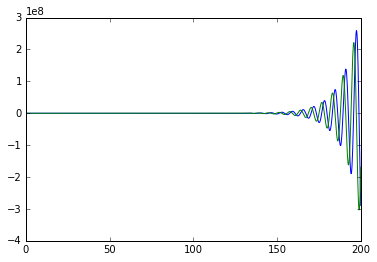

In [100]:
initial_state = array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 1000
tau = 200
wanted_times = linspace(0, tau, N)
answer = euler(SHO, initial_state, wanted_times)


# Plot the results
x = answer[:,0]
v = answer[:,1]
plot(wanted_times, x, 'b-')
plot(wanted_times, v, 'g-')
show()


### Exercise 2:

1. Vary parameters *tau* and *N* and see how the precision of the method depends on them
1. Replace *SHO* function with the function you wrote in Exercise 1. Compare error of the Euler method for different functions. 

[[  1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00  -1.09010011e-01]
 [  9.98787430e-01  -2.18020022e-01]
 ..., 
 [ -4.86278387e+02  -9.77819800e+01]
 [ -4.87366062e+02  -9.78909900e+01]
 [ -4.88454950e+02  -9.80000000e+01]]


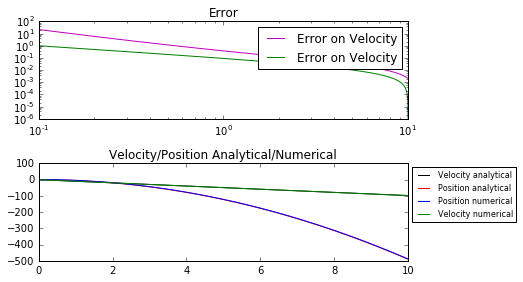

In [19]:
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def euler(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(y[j-1], t)*dt
        
    # return the answer
    return y



initial_state = array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
#N = 9000
#tau = 100
N = 900
tau = 10

wanted_times = linspace(0, tau, N)
answer = euler(freeFall, initial_state, wanted_times)
#answer = euler(DHO, initial_state, wanted_times)
print answer

plt.subplot(2,1,1)
plt.title("Error")
#xn/xa -1
plt.loglog(t, abs((x/position)-1), 'm', label = "Error on Velocity")
plt.loglog(t, abs((v/velocity)-1), 'g', label = "Error on Velocity")

plt.legend(loc = 'upper right')
plt.subplot(2,1,2)

plt.title("Velocity/Position Analytical/Numerical")
# Plot the results
x = answer[:,0]
v = answer[:,1]

t = linspace(.1,tau, N)
acceleration = -9.8
velocity = -9.8*t
position =-9.8/2. * t**2

plt.plot(t, velocity, 'black', label = 'Velocity analytical' )
plt.plot(t, position, 'r', label = 'Position analytical')

plot(wanted_times, x, 'b-', label = 'Position numerical')

plot(wanted_times, v, 'g-', label = 'Velocity numerical')
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))
plt.tight_layout()
show()

### Euler-Cromer (improved Euler)

In [70]:
def eulerC(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(y[j-1], t)*dt
        
        
    # improve the calculation by computing the velocity at the *next* step    
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j,0] = y[j-1,0] + derivs(y[j-1], t)[0]*dt    
        y[j,1] = y[j-1,1] + derivs(y[j], t)[1]*dt    
    # return the answer
    return y


### Same example

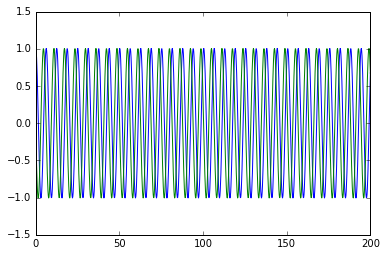

In [71]:
answer = eulerC(SHO, initial_state, wanted_times)

# Plot the results
x = answer[:,0]
v = answer[:,1]
plot(wanted_times, x, 'b-')
plot(wanted_times, v, 'g-')
show()


### Exercise 3:

1. Vary parameters *tau* and *N* and see how the precision of the method depends on them
1. Replace *SHO* function with the function you wrote in Exercise 1. Compare error of the Euler-Cromer method for different functions. 

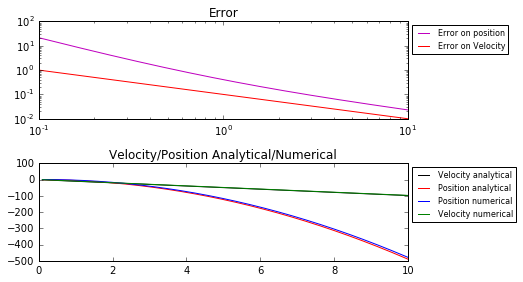

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import*
%matplotlib inline

def freeFall(state, time):
    g0 = state[1]
    g1= -9.8
    return np.array([g0, g1])


def eulerC(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(y[j-1], t)*dt
        
        
    # improve the calculation by computing the velocity at the *next* step    
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j,0] = y[j-1,0] + derivs(y[j-1], t)[0]*dt    
        y[j,1] = y[j-1,1] + derivs(y[j], t)[1]*dt    
    # return the answer
    return y



initial_state = np.array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
#N = 9000
#tau = 100
N = 900
tau = 10
t = linspace(.1,tau, N)

wanted_times = linspace(0.1, tau, N)
answer = eulerC(freeFall, initial_state, wanted_times)

x = answer[:,0]
v = answer[:,1]

acceleration = -9.8
velocity = -9.8*t
position =-9.8/2. * t**2

plt.subplot(2,1,1)
plt.title("Error")
#xn/xa -1
plt.loglog(t, abs((x/position)-1), 'm', label = "Error on position")
plt.loglog(t, abs((v/velocity)-1), 'r', label = 'Error on Velocity')
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))


plt.subplot(2,1,2)
plt.title("Velocity/Position Analytical/Numerical")
# Plot the results

plt.plot(t, velocity, 'black', label = 'Velocity analytical' )
plt.plot(t, position, 'r', label = 'Position analytical')

plot(wanted_times, x, 'b-', label = 'Position numerical')

plot(wanted_times, v, 'g-', label = 'Velocity numerical')
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))
plt.tight_layout()
show()

## Runge-Kutta method

Now try to implement a 2nd-order RK
This function moves the value of ’y’ forward by a single step of size ’dt’, 
using a second−order Runge−Kutta algorithm. This particular algorithm is equivalent to 
finding the average of the slope at time t and at time
( t+dt ) , and using that average slope to find value of y.

In [72]:
def rk2(y, time, dt, derivs): 
    k0 = dt*derivs(y, time)
    k1 = dt*derivs(y+k0, time+dt) 
    y_next = y+0.5*(k0+k1)
    return y_next


### Examples

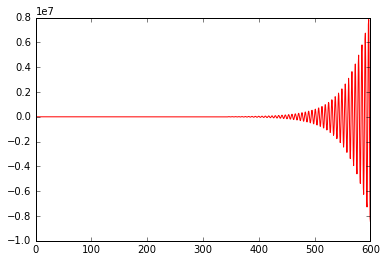

In [6]:
import numpy as np
from pylab import*
%matplotlib inline

def SHO(state, time):
    g0 = state[1]
    g1 = -omega*omega*state[0]
    return array([g0,g1])

def rk2(y, time, dt, derivs): 
    k0 = dt*derivs(y, time)
    k1 = dt*derivs(y+k0, time+dt) 
    y_next = y+0.5*(k0+k1)
    return y_next

initial_state = array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 1000
tau = 600
dt = tau/float(N-1)
wanted_times = linspace(0, tau, N)

#answerE  = euler(SHO, initial_state, wanted_times)

answerRK = zeros([N,2])
answerRK[0,:] = initial_state
for j in range (N-1):
    answerRK[j+1] = rk2(answerRK[j], 0, dt , SHO)

# Plot the results
#xE = answerE[:,0]
#vE = answerE[:,1]
xRK = answerRK[:,0]
vRK = answerRK[:,1]
#plot(wanted_times, x, 'b-')
#plot(wanted_times, xE, 'g-')
plot(wanted_times, xRK, 'r-')

show()


### Exercise 4:

1. Vary parameters *tau* and *N* and see how the precision of the method depends on them
1. Replace *SHO* function with the function you wrote in Exercise 1. Compare error of the RK2 method for different functions. 

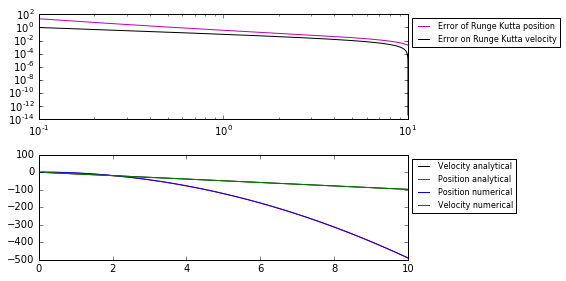

In [16]:
def rk2(y, time, dt, derivs): 
    k0 = dt*derivs(y, time)
    k1 = dt*derivs(y+k0, time+dt) 
    y_next = y+0.5*(k0+k1)
    return y_next


initial_state = array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 9000
tau = 10
dt = tau/float(N-1)
wanted_times = linspace(0, tau, N)

answerE  = euler(freeFall, initial_state, wanted_times)

answerRK = zeros([N,2])
answerRK[0,:] = initial_state
for j in range (N-1):
    answerRK[j+1] = rk2(answerRK[j], 0, dt , freeFall)

    
xE = answerE[:,0]
vE = answerE[:,1]
xRK = answerRK[:,0]
vRK = answerRK[:,1]

t = linspace(.1,tau, N)
acceleration = -9.8
velocity = -9.8*t
position =-9.8/2. * t**2
    
    
    
plt.subplot(2,1,1)   

plt.loglog(t, abs((xRK/position)-1), 'm', label = 'Error of Runge Kutta position')
plt.loglog(t, abs((vRK/velocity)-1), 'black', label = 'Error on Runge Kutta velocity')   
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))


plt.subplot(2,1,2)
# Plot the results

plt.plot(t, velocity, 'black', label = 'Velocity analytical' )
plt.plot(t, position, 'r', label = 'Position analytical')

plot(wanted_times, xRK, 'b-', label = 'Position numerical')

plot(wanted_times, vRK, 'g-', label = 'Velocity numerical')
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))
plt.tight_layout()

#plot(wanted_times, vE, 'm-')
#plot(wanted_times, xE, 'b')
#plot(wanted_times, xRK, 'g')
plt.tight_layout()
show()


### Exercise 5:

1. Implement 4th order Runge-Kutta method
1.Vary parameters *tau* and *N* and see how the precision of the method depends on them
1. Replace *SHO* function with the function you wrote in Exercise 1. Compare error of the RK4 method for different functions. 

In [26]:
from math import sin
from numpy import arange
from pylab import *

def freeFall(state, time):
    g0 = state[1]
    g1= -9.8
    return np.array([g0, g1])


def rk4(y, time, dt, derivs): 
    k0 = dt*derivs(y, time)
    k1 = dt*derivs(y+k0, time+dt) 
    y_next = y+0.5*(k0+k1)
    return y_next

a = 0.0
tau = 10.0
N = 100
h = (tau-a)/N

tpoints = arange(a,tau,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*freeFall(x,t)
    k2 = h*freeFall(x+0.5*k1,t+0.5*h)
    k3 = h*freeFall(x+0.5*k2,t+0.5*h)
    k4 = h*freeFall(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6
    
    


plot(tpoints , xpoints)
xlabel("t")
ylabel("x(t)")
show()

TypeError: 'float' object has no attribute '__getitem__'

## SciPy library 

SciPy offers an interface to LSODA routine from ODEPACK Fortran library (adaptive, high-performance multi-step integration) -- scipy.integrate.odeint routine

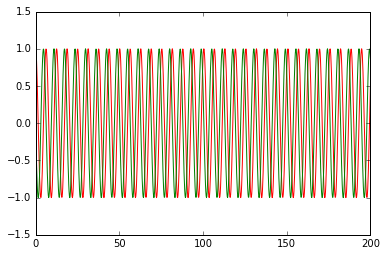

In [5]:
from scipy.integrate import odeint

initial_state = array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 1000
tau = 200
dt = tau/float(N-1)
wanted_times = linspace(0, tau, N)

answer  = odeint(SHO, initial_state, wanted_times)
x = answer[:,0]
v = answer[:,1]
plot(wanted_times, x, 'r-')
plot(wanted_times, v, 'g-')
show()


### Exercise 6:

1. Vary parameters *tau* and *N* and see how the precision of the method depends on them
1. Replace *SHO* function with the function you wrote in Exercise 1. Compare error of the *odeint* method for different functions. 

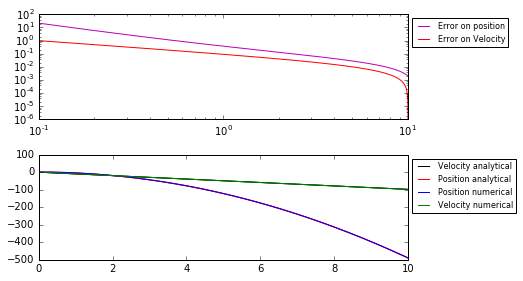

In [18]:
from scipy.integrate import odeint

initial_state = array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 9000
tau = 10
dt = tau/float(N-1)
wanted_times = linspace(0, tau, N)

t = linspace(.1,tau, N)
acceleration = -9.8
velocity = -9.8*t
position =-9.8/2. * t**2
    
answer  = odeint(freeFall, initial_state, wanted_times)
x = answer[:,0]
v = answer[:,1]

plt.subplot(2,1,1)
plt.loglog(t, abs((x/position)-1), 'm', label = "Error on position")
plt.loglog(t, abs((v/velocity)-1), 'r', label = 'Error on Velocity')
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))

plt.subplot(2,1,2)
plot(wanted_times, x, 'r-')
plot(wanted_times, v, 'g-')

plt.plot(t, velocity, 'black', label = 'Velocity analytical' )
plt.plot(t, position, 'r', label = 'Position analytical')

plot(wanted_times, x, 'b-', label = 'Position numerical')

plot(wanted_times, v, 'g-', label = 'Velocity numerical')
plt.legend(loc='upper left', prop={'size':8}, bbox_to_anchor=(1,1))
plt.tight_layout()

show()
